In [ ]:
# HR Analytics Project- Understanding the Attrition in HR
Problem Statement:
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well.
The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

HR Analytics:
Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. 
Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in HR:
Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.
How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

Attrition affecting Companies:
A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. 
This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers. 

In [93]:
#Imoporting neccecory Libraries:

#common lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#preprocessing lib:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

#outliers lib:
from scipy import stats

#multicolliniarity lib:
from sklearn.feature_selection import SelectKBest,f_classif
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

#Model building lib 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.svm import SVC

#model evaluation lib:
from sklearn.metrics import classification_report,roc_auc_score,accuracy_score,confusion_matrix,plot_roc_curve

#model hyper parameter tuning lib:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

In [48]:
#Loading the Dataset:
df=pd.read_csv('HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [49]:
pd.set_option('display.max_rows',None)

In [50]:
df.shape
#there is 1470 rows and 35 columns is availble in the data

(1470, 35)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [16]:
#checking null value from the dataframe
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

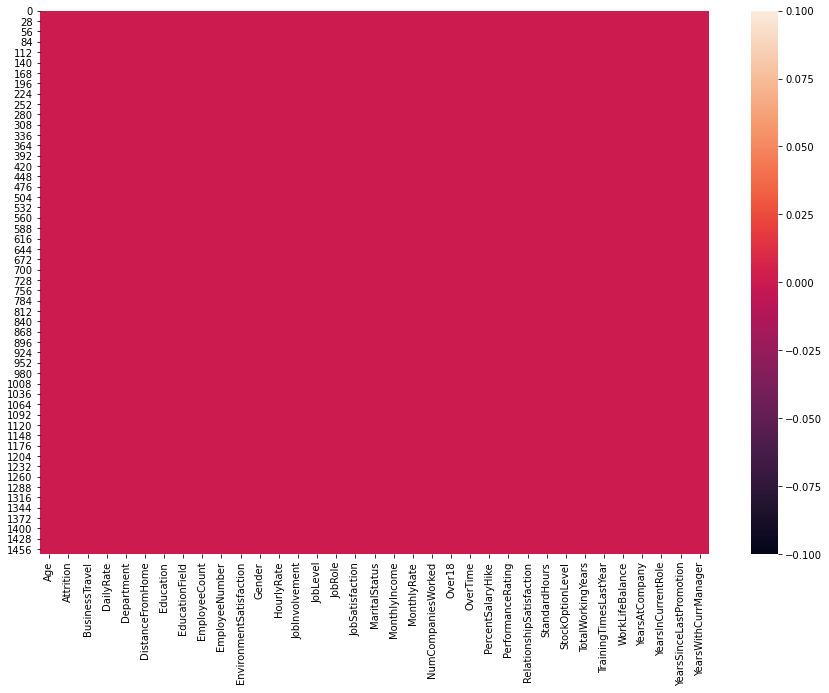

In [18]:
#there is no null value available in the dataframe.cross checking the same with the heatmap.
plt.figure(figsize=(15,10))
sns.heatmap(df.isna())
plt.show()

In [51]:
#Saving catagorial data into list for the binary encoding
dt_value=['int8','int16','int32','int64','float16','float32','float64']
cat_data=[]
feature_type=df.columns.values.tolist()


for column in feature_type:
    if df[column].dtype in dt_value:
        continue
    cat_data.append(column)        

In [5]:
cat_data

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [6]:
df[['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime']].head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [10]:
df['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [52]:
#Using label encoder to convert chategorical data to binary data:
var_mod=['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime']
lb=LabelEncoder()

for i in var_mod:
    df[i]=lb.fit_transform(df[i])

In [53]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


In [15]:
#checking the value count after label encoding
df['OverTime'].value_counts()

0    1054
1     416
Name: OverTime, dtype: int64

In [9]:
#describing the dataset using describe method.
df.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,1.0,2068.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
#from the describe we can see that the mean and the median(50%) is approx same so there is less chance of outliers and skewness in the df.
#the standred daviation for the some features is not looks normal.

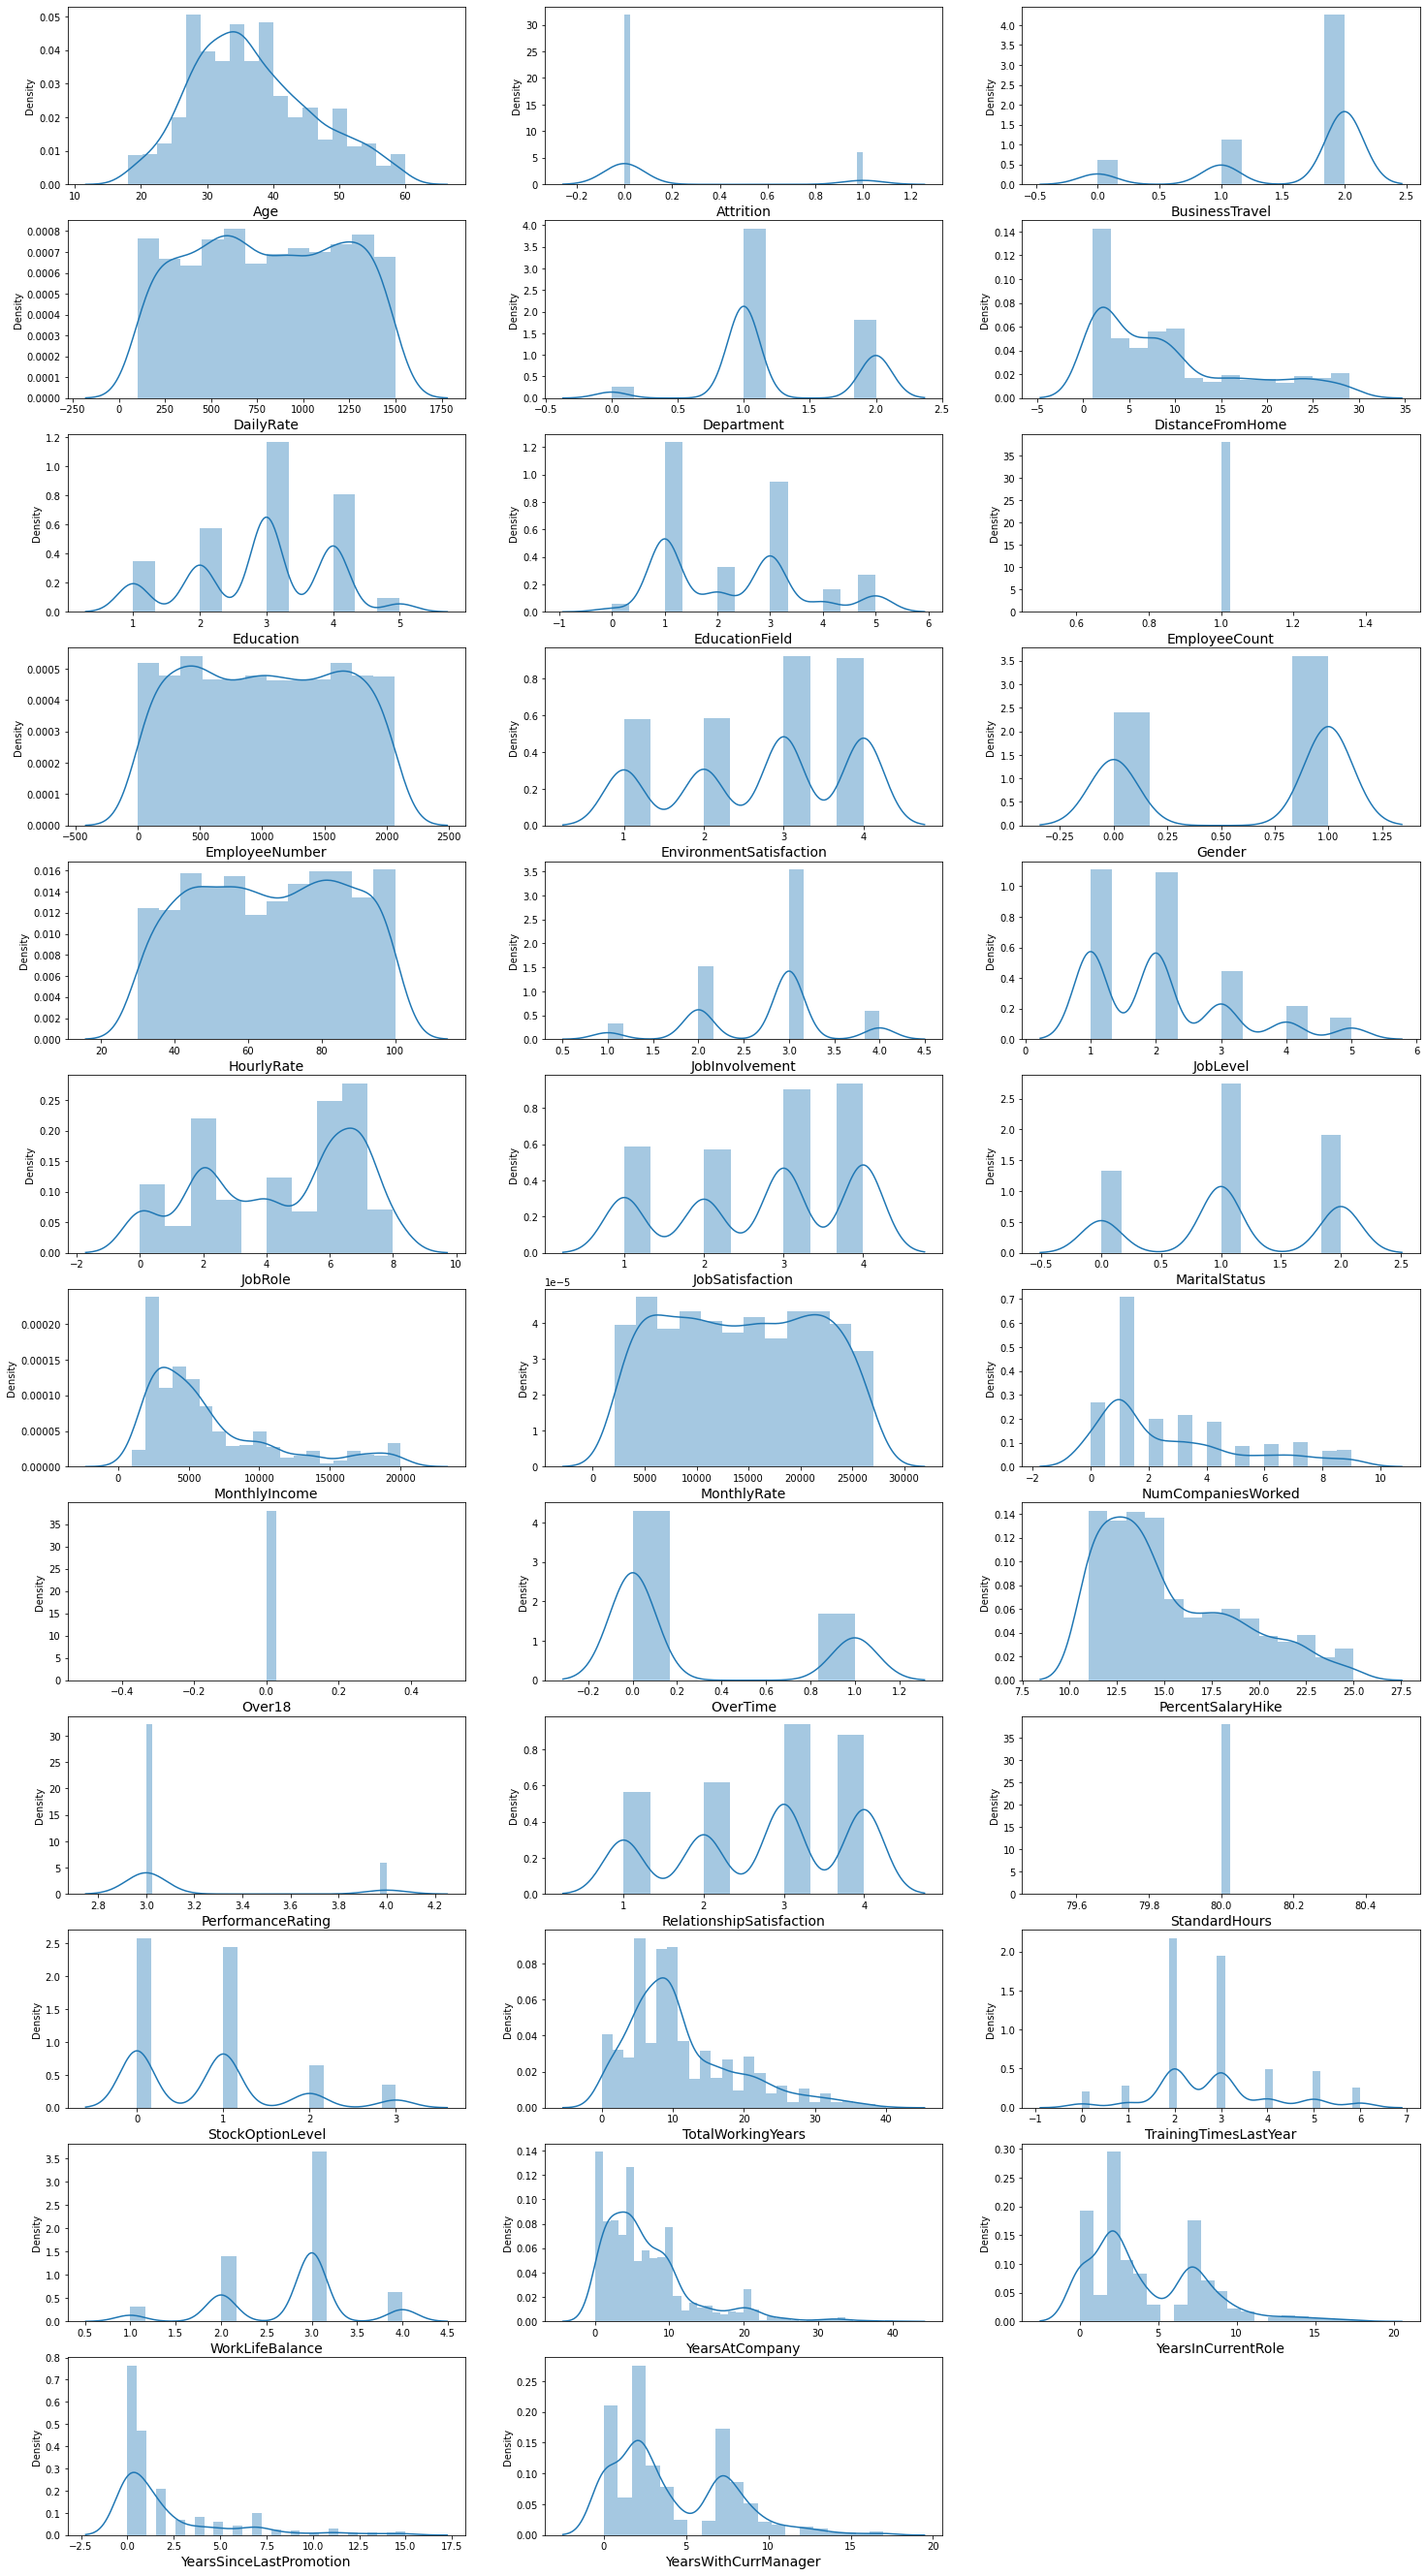

In [27]:
#checking the data distrubution using the distribution plot.
plt.figure(figsize=(25,48),facecolor='white')
pltnum=1

for column in df:
    if pltnum <=36:
        plt.subplot(12,3,pltnum)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=14)
        
    pltnum +=1
plt.show()    

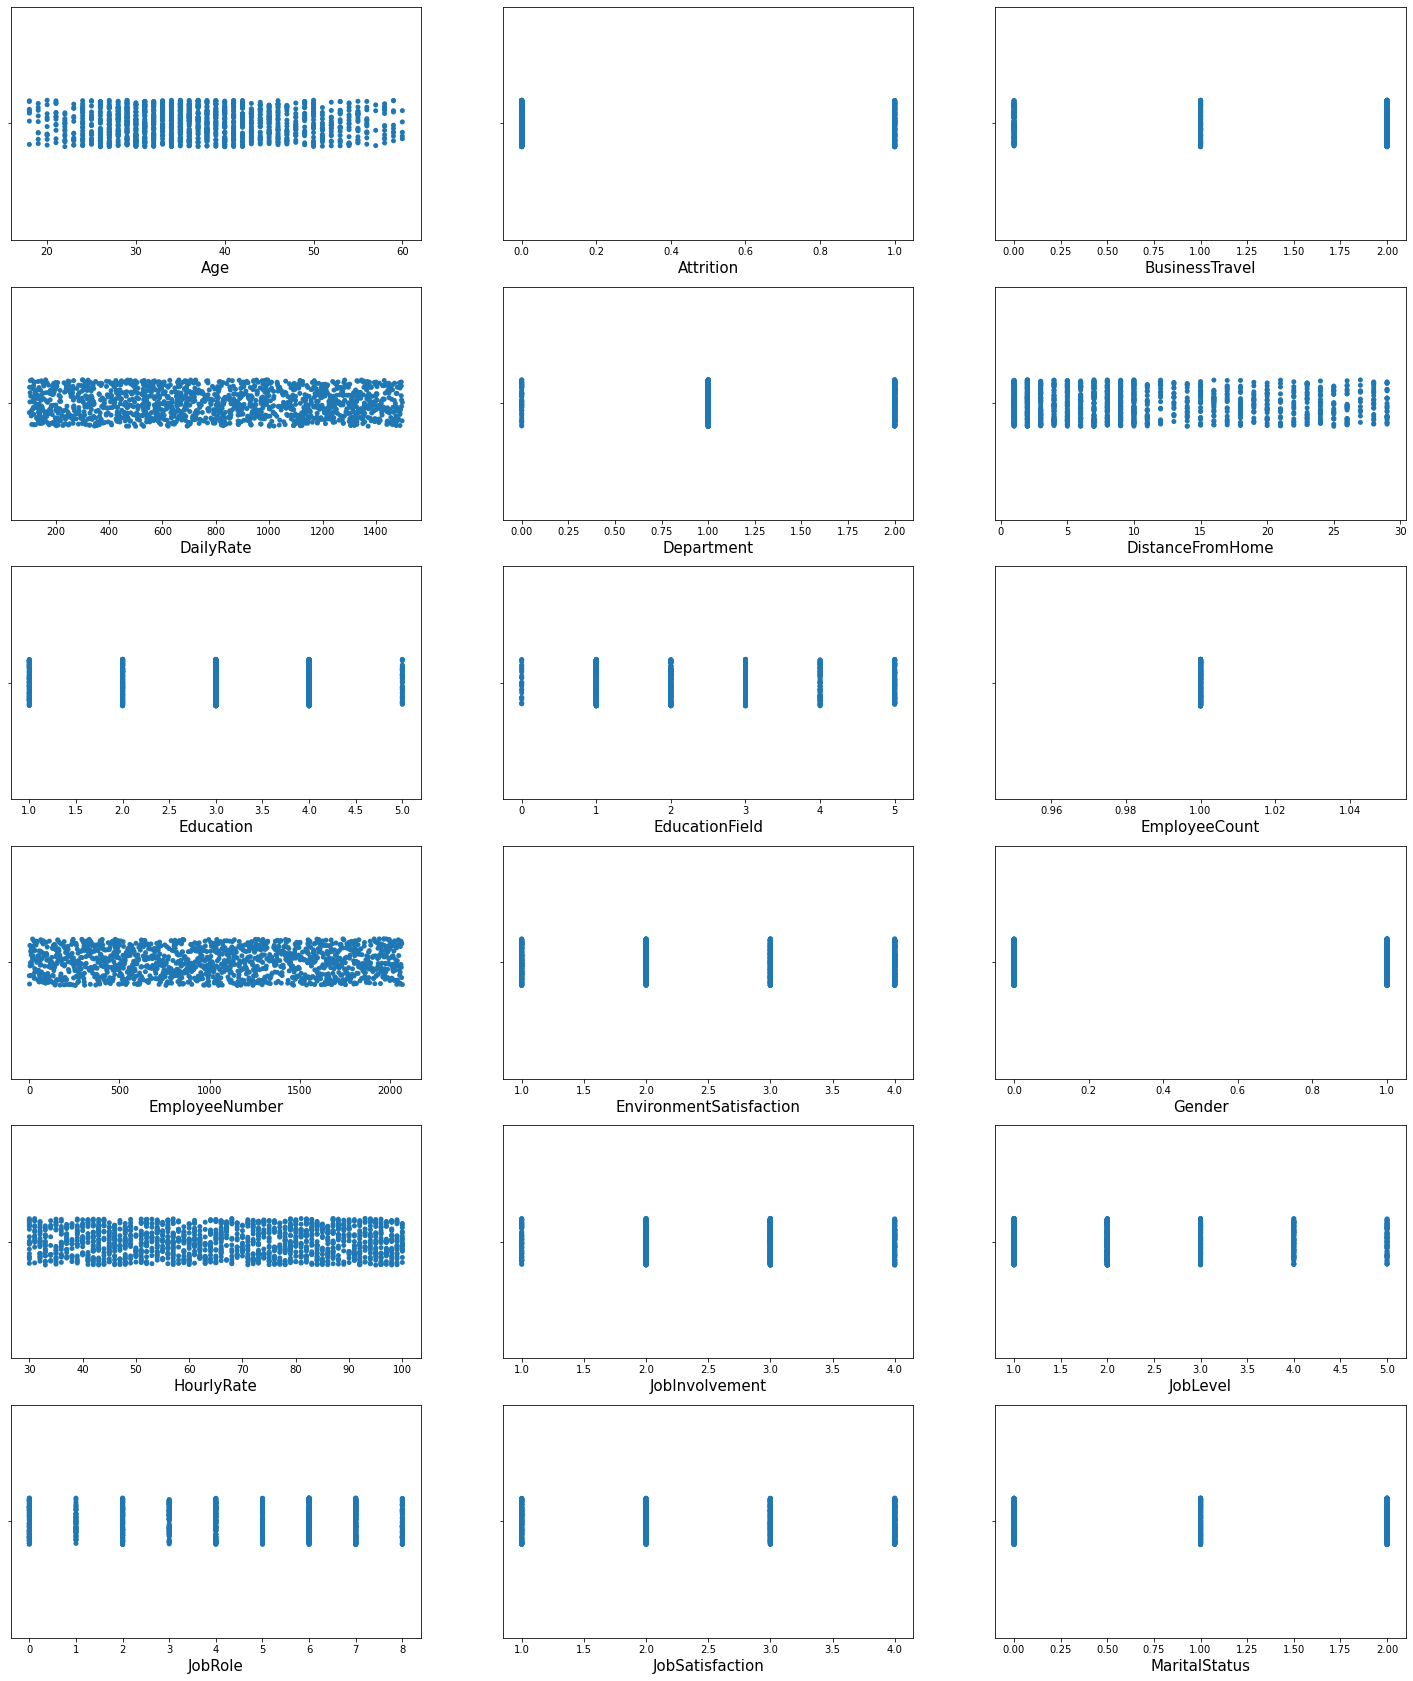

In [30]:
#checking the data distrubution using the distribution plot.
plt.figure(figsize=(25,30),facecolor='white')
pltnum=1

for column in df.columns[:18]:
    if pltnum <= 18:
        plt.subplot(6,3,pltnum)
        sns.stripplot(df[column])
        plt.xlabel(column,fontsize=15)
        
    pltnum +=1
plt.show()    

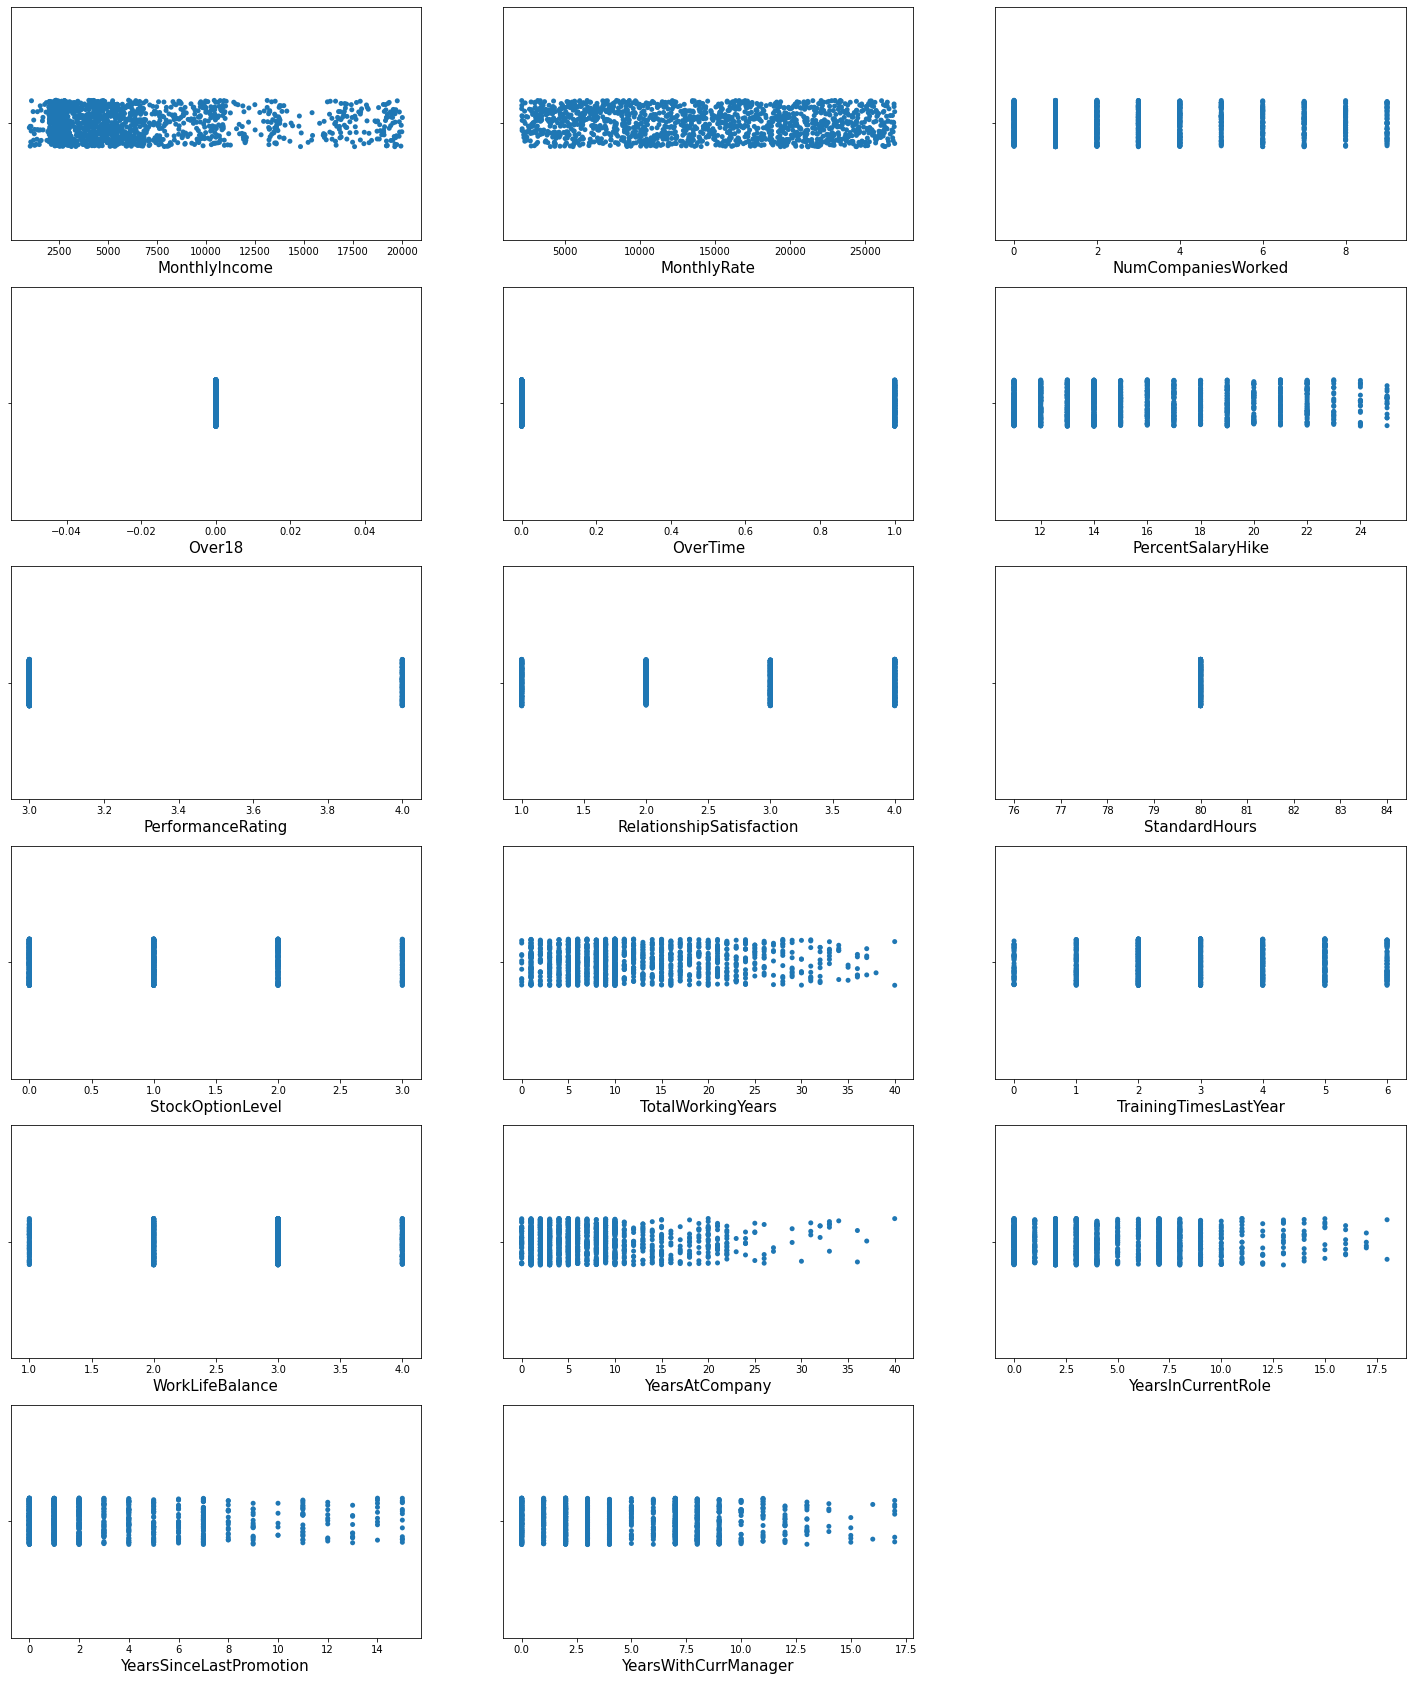

In [32]:
#checking the data distrubution for remaining features using the distribution plot.
plt.figure(figsize=(25,30),facecolor='white')
pltnum=1

for column in df.columns[18:]:
    if pltnum <= 18:
        plt.subplot(6,3,pltnum)
        sns.stripplot(df[column])
        plt.xlabel(column,fontsize=15)
        
    pltnum +=1
plt.show()    

In [ ]:
#Data distribution looks normal in strip plot.Now checking the outliers using the box plot.

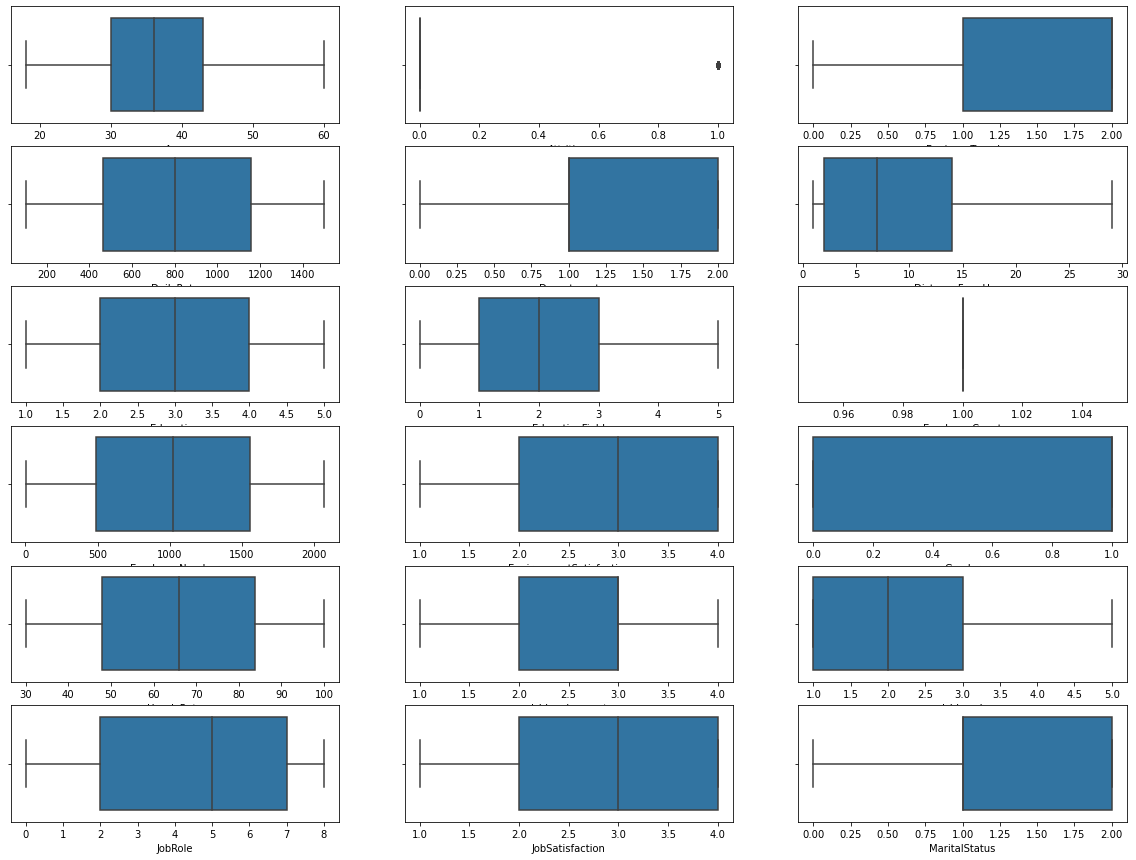

In [33]:
#using box plot to check the outliers in the feature.
plt.figure(figsize=(20,15),facecolor='white')
pltnum=1

for column in df.columns[:18]:
    if pltnum <= 18:
        plt.subplot(6,3,pltnum)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=10)
        
    pltnum +=1
plt.show() 

In [ ]:
#here we can see there is no outliers present in the features between 0 to 17.

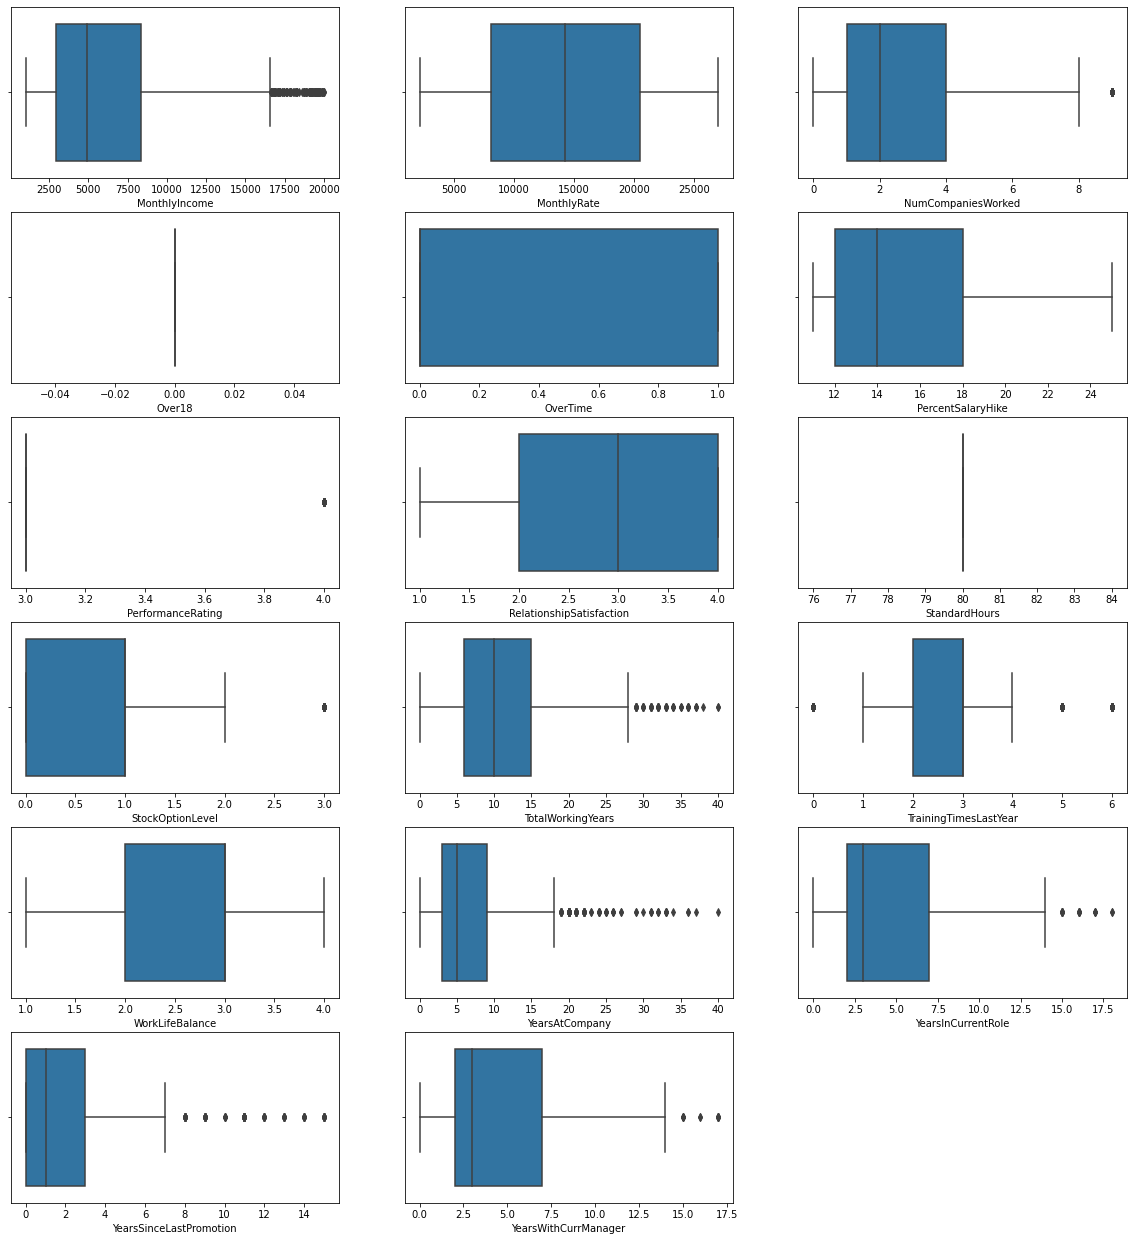

In [36]:
#using box plot to check the outliers in the remaining feature.
plt.figure(figsize=(20,22),facecolor='white')
pltnum=1

for column in df.columns[18:]:
    if pltnum <= 18:
        plt.subplot(6,3,pltnum)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=10)
        
    pltnum +=1
plt.show() 

In [ ]:
#here we can see that there is some outliers present the in the few of the feature.
#the features with the outliers are:
#MonthlyIncome,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
#18,20,27,28,29,31,32,33,34

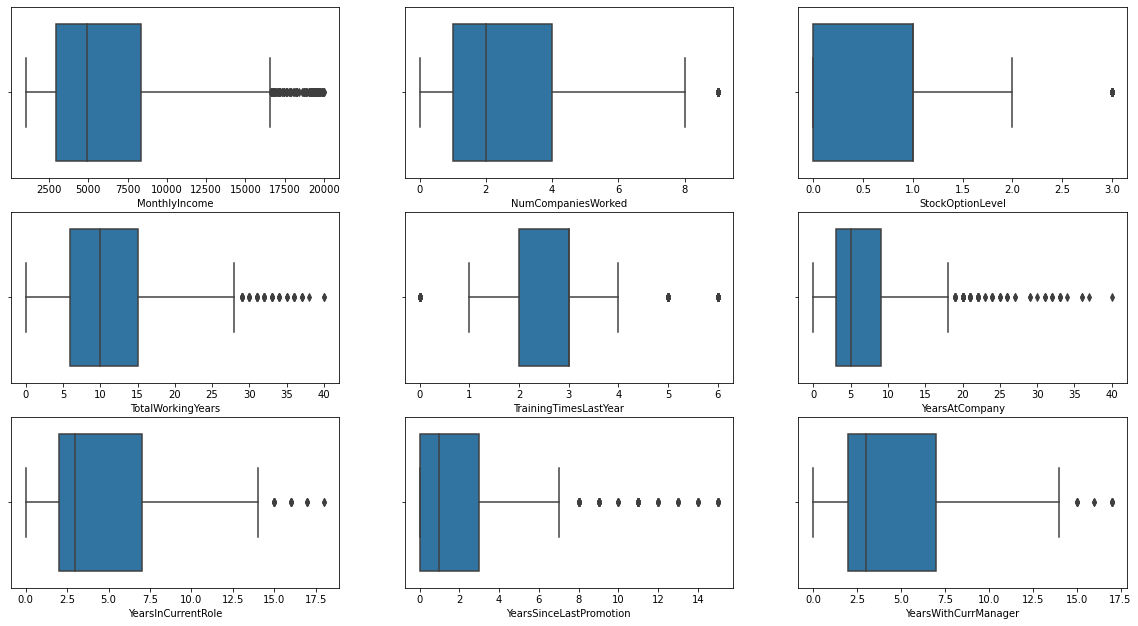

In [38]:
#the features with ouliers with boxplot.
plt.figure(figsize=(20,22),facecolor='white')
pltnum=1

for column in df.iloc[:,[18,20,27,28,29,31,32,33,34]]:
    if pltnum <= 18:
        plt.subplot(6,3,pltnum)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=10)
        
    pltnum +=1
plt.show() 

In [54]:
#Using z-score to delete the outliers:
z=np.abs(stats.zscore(df.iloc[:,[18,20,27,28,29,31,32,33,34]]))

#index
index=np.where(z > 3)[0]

In [56]:
#Droping the outliers index
df=df.drop(df.index[index])
df.reset_index()

,index,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41,1,2,1102,2,1,2,1,1,...,1,80,0,8,0,1,6,4,0,5
1,1,49,0,1,279,1,8,1,1,1,...,4,80,1,10,3,3,10,7,1,7
2,2,37,1,2,1373,1,2,2,4,1,...,2,80,0,7,3,3,0,0,0,0
3,3,33,0,1,1392,1,3,4,1,1,...,3,80,0,8,3,3,8,7,3,0
4,4,27,0,2,591,1,2,1,3,1,...,4,80,1,6,3,3,2,2,2,2
5,5,32,0,1,1005,1,2,2,1,1,...,3,80,0,8,2,2,7,7,3,6
6,6,59,0,2,1324,1,3,3,3,1,...,1,80,3,12,3,2,1,0,0,0
7,7,30,0,2,1358,1,24,1,1,1,...,2,80,1,1,2,3,1,0,0,0
8,8,38,0,1,216,1,23,3,1,1,...,2,80,0,10,2,3,9,7,1,8
9,9,36,0,2,1299,1,27,3,3,1,...,2,80,2,17,3,2,7,7,7,7


In [57]:
#checking the shape after deletion
df.shape

(1387, 35)

In [58]:
#Data Loss in percentage
loss_percentage=(1470-1387)/1470*100
print(loss_percentage)

5.646258503401361


In [ ]:
#the data loss in percentage is 5.64 which is ok as it is less than 7%

In [59]:
#checking the skewness and correlation between the featues and labels
corr=df.abs().corr()
corr['Attrition'].sort_values(ascending=False)

Attrition                   1.000000
OverTime                    0.257237
MaritalStatus               0.160960
DistanceFromHome            0.081788
JobRole                     0.064283
Department                  0.063637
NumCompaniesWorked          0.050314
Gender                      0.036252
EducationField              0.023585
MonthlyRate                 0.014888
PerformanceRating           0.010781
BusinessTravel             -0.001041
HourlyRate                 -0.001532
PercentSalaryHike          -0.006267
EmployeeNumber             -0.010169
YearsSinceLastPromotion    -0.029263
Education                  -0.032703
RelationshipSatisfaction   -0.052344
DailyRate                  -0.057220
TrainingTimesLastYear      -0.057285
WorkLifeBalance            -0.062492
EnvironmentSatisfaction    -0.112393
JobSatisfaction            -0.114206
JobInvolvement             -0.133957
StockOptionLevel           -0.136676
Age                        -0.159366
MonthlyIncome              -0.161848
Y

In [110]:
#there is no skweness in the features as the range is between -0.5 to +0.5

In [ ]:
#checking the value count for column StandardHours
df['StandardHours'].value_counts()

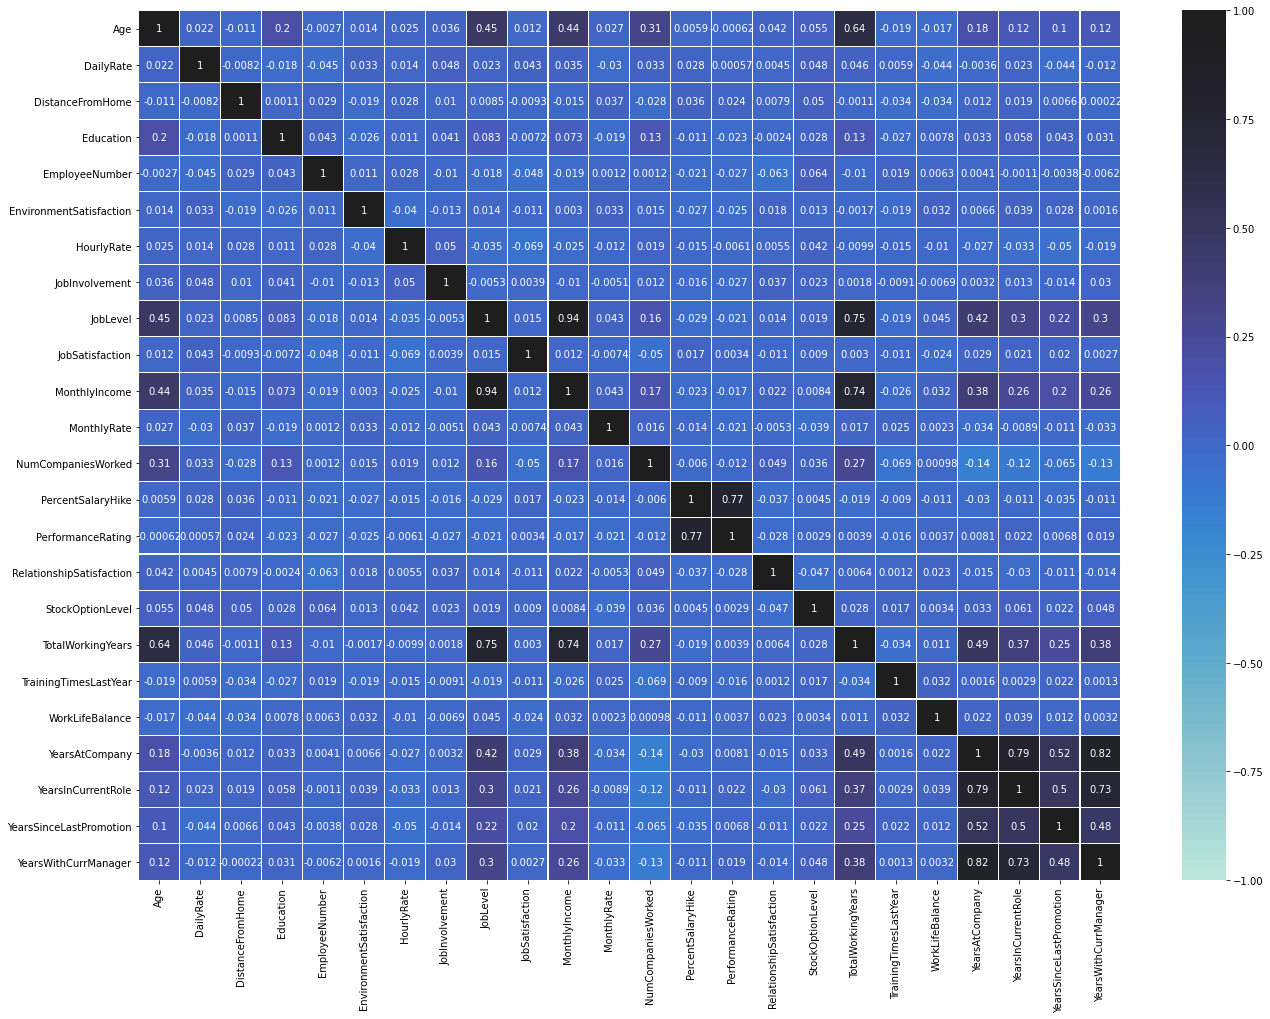

In [72]:
#using the heatmap to check the correlation between features.
corr_matrix=df.iloc[:,[0,3,5,6,9,10,12,13,14,16,18,19,20,23,24,25,27,28,29,30,31,32,33,34]].abs().corr()

plt.figure(figsize=(22,16))

sns.heatmap(corr_matrix,vmin=-1,vmax=1,center=True,annot=True, fmt='.2g',linewidths=0.1)
plt.show()

#as we can see in heatmap there is no correlation between the features and labels

In [73]:
#here we can see multicolliniarity between features(joblevel,monthlyincome),(years at company and yearscurrentrole)
#we use vif to check the multicolliarity issue
#df.iloc[:,[1,2,4,7,8,11,15,17,21,22,26]].head()

In [74]:
df1=df
df1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


In [75]:
x=df1.drop(columns='Attrition')
y=df1['Attrition']

In [76]:
scalar=StandardScaler()
x_data=scalar.fit_transform(x)

In [83]:
#shape of x
x.shape

(1387, 34)

In [84]:
#performing the variance infletion factor to check multicolliniarity between features
vif=pd.DataFrame()
vif['feature name']=x.columns
vif['vif score']=[variance_inflation_factor(x_data,i) for i in range(x_data.shape[1])]
vif

,feature name,vif score
0,Age,1.850575
1,BusinessTravel,1.014352
2,DailyRate,1.031238
3,Department,2.062046
4,DistanceFromHome,1.020177
5,Education,1.063297
6,EducationField,1.021559
7,EmployeeCount,NaN
8,EmployeeNumber,1.022228
9,EnvironmentSatisfaction,1.021645


In [ ]:
#here we can see that there is multicolliniarity issue between the (MonthlyIncome,JobLevel)
#So we can drop the colomn the job level form x.

In [85]:
#dropping the feature JobLevel as it has highest vif
x=df.drop(columns='JobLevel',axis=1)

In [86]:
x_data=scalar.fit_transform(x)

In [87]:
vif=pd.DataFrame()
vif['feature name']=x.columns
vif['vif score']=[variance_inflation_factor(x_data,i) for i in range(x_data.shape[1])]
vif

,feature name,vif score
0,Age,1.860981
1,Attrition,1.295268
2,BusinessTravel,1.013512
3,DailyRate,1.031139
4,Department,1.949420
5,DistanceFromHome,1.023906
6,Education,1.062902
7,EducationField,1.020810
8,EmployeeCount,NaN
9,EmployeeNumber,1.022399


In [ ]:
#Checking the upsampling and downsampling(class imbalanced problem) for the target columns

In [88]:
y.value_counts()

0    1158
1     229
Name: Attrition, dtype: int64

In [ ]:
#here we can see the issue of class imbalanced problem as 0 has 1158 count and 1 has only 229 count.

In [89]:
#handling class imbalanced problem by oversampling the minority class using SMOTE:
from imblearn.over_sampling import SMOTE

In [90]:
SM=SMOTE()
x_fit,y_fit=SM.fit_resample(x_data,y)

In [91]:
y_fit.value_counts()

1    1158
0    1158
Name: Attrition, dtype: int64

In [94]:
#Finding best Random State:
maxAcc=0
maxRs=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x_fit,y_fit,test_size=0.25,random_state=i)
    dt=LogisticRegression()
    dt.fit(x_train,y_train)
    y_pred=dt.predict(x_test)
    acc_s=accuracy_score(y_test,y_pred)
    if acc_s > maxAcc:
        maxAcc=acc_s
        maxRs=i
        
print(f"Best Accuracy is : {maxAcc* 100:.2f}%")
print("The Best Random State is :",maxRs)

Best Accuracy is : 100.00%
The Best Random State is : 1


In [95]:
#seprating the train and test datasets with the best find random state
x_train,x_test,y_train,y_test=train_test_split(x_fit,y_fit,test_size=0.25,random_state=1)

In [96]:
#Using the DecisionTreeClassifier algorithm to check the accuray score,DecisionTreeClassifier and Confusion Matrix:
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_predlr=lr.predict(x_test)

print('\n==========Outputs of Logistics Reggression===========')

print('\n==========Accuracy Score===========')
print(f"Accuracy Score is : {accuracy_score(y_test,y_predlr)* 100:.2f}%\n")

print('======Classification Report=============')
print(classification_report(y_test,y_predlr,digits=2),'\n')

print('=========Confusion Matrix============')
print(confusion_matrix(y_test,y_predlr))


==========Outputs of Logistics Reggression===========

==========Accuracy Score===========
Accuracy Score is : 100.00%

======Classification Report=============
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       303
           1       1.00      1.00      1.00       276

    accuracy                           1.00       579
   macro avg       1.00      1.00      1.00       579
weighted avg       1.00      1.00      1.00       579
 

=========Confusion Matrix============
[[303   0]
 [  0 276]]


In [97]:
#Using the DecisionTreeClassifier algorithm to check the accuray score,DecisionTreeClassifier and Confusion Matrix:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_preddt=dt.predict(x_test)

print('\n==========Outputs of DT===========')

print('\n==========Accuracy Score===========')
print(f"Accuracy Score is : {accuracy_score(y_test,y_preddt)* 100:.2f}%\n")

print('======Classification Report=============')
print(classification_report(y_test,y_preddt,digits=2),'\n')

print('=========Confusion Matrix============')
print(confusion_matrix(y_test,y_preddt))


==========Outputs of DT===========

==========Accuracy Score===========
Accuracy Score is : 100.00%

======Classification Report=============
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       303
           1       1.00      1.00      1.00       276

    accuracy                           1.00       579
   macro avg       1.00      1.00      1.00       579
weighted avg       1.00      1.00      1.00       579
 

=========Confusion Matrix============
[[303   0]
 [  0 276]]


In [98]:
#Using the AdaBoostClassifier algorithm to check the accuray score,DecisionTreeClassifier and Confusion Matrix:
abc=AdaBoostClassifier()
abc.fit(x_train,y_train)
y_predabc=abc.predict(x_test)

print('\n==========Outputs of ADA Boost===========')

print('\n==========Accuracy Score===========')
print(f"Accuracy Score is : {accuracy_score(y_test,y_predabc)* 100:.2f}%\n")

print('======Classification Report=============')
print(classification_report(y_test,y_predabc,digits=2),'\n')

print('=========Confusion Matrix============')
print(confusion_matrix(y_test,y_predabc))


==========Outputs of ADA Boost===========

==========Accuracy Score===========
Accuracy Score is : 100.00%

======Classification Report=============
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       303
           1       1.00      1.00      1.00       276

    accuracy                           1.00       579
   macro avg       1.00      1.00      1.00       579
weighted avg       1.00      1.00      1.00       579
 

=========Confusion Matrix============
[[303   0]
 [  0 276]]


In [99]:
#Using the SVC algorithm to check the accuray score,DecisionTreeClassifier and Confusion Matrix:

svc=SVC(probability=True)
svc.fit(x_train,y_train)
y_predsvc=svc.predict(x_test)

print('\n==========Outputs of SVC===========')

print('\n==========Accuracy Score===========')
print(f"Accuracy Score is : {accuracy_score(y_test,y_predsvc)* 100:.2f}%\n")

print('======Classification Report=============')
print(classification_report(y_test,y_predsvc,digits=2),'\n')

print('=========Confusion Matrix============')
print(confusion_matrix(y_test,y_predsvc))


==========Outputs of SVC===========

==========Accuracy Score===========
Accuracy Score is : 100.00%

======Classification Report=============
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       303
           1       1.00      1.00      1.00       276

    accuracy                           1.00       579
   macro avg       1.00      1.00      1.00       579
weighted avg       1.00      1.00      1.00       579
 

=========Confusion Matrix============
[[303   0]
 [  0 276]]


In [100]:
#Using the RandomForestClassifier algorithm to check the accuray score,DecisionTreeClassifier and Confusion Matrix:

rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
y_predrfc=rfc.predict(x_test)

print('\n==========Outputs of Random Forest Classifier===========')

print('\n==========Accuracy Score===========')
print(f"Accuracy Score is : {accuracy_score(y_test,y_predrfc)* 100:.2f}%\n")

print('======Classification Report=============')
print(classification_report(y_test,y_predrfc,digits=2),'\n')

print('=========Confusion Matrix============')
print(confusion_matrix(y_test,y_predrfc))


==========Outputs of Random Forest Classifier===========

==========Accuracy Score===========
Accuracy Score is : 100.00%

======Classification Report=============
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       303
           1       1.00      1.00      1.00       276

    accuracy                           1.00       579
   macro avg       1.00      1.00      1.00       579
weighted avg       1.00      1.00      1.00       579
 

=========Confusion Matrix============
[[303   0]
 [  0 276]]


In [101]:
#Using the KNeighborsClassifier algorithm to check the accuray score,DecisionTreeClassifier and Confusion Matrix:

knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_predknn=knn.predict(x_test)

print('\n==========Outputs of KNeighborsClassifier===========')

print('\n==========Accuracy Score===========')
print(f"Accuracy Score is : {accuracy_score(y_test,y_predknn)* 100:.2f}%\n")

print('======Classification Report=============')
print(classification_report(y_test,y_predknn,digits=2),'\n')

print('=========Confusion Matrix============')
print(confusion_matrix(y_test,y_predknn))


==========Outputs of KNeighborsClassifier===========

==========Accuracy Score===========
Accuracy Score is : 98.45%

======Classification Report=============
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       303
           1       0.97      1.00      0.98       276

    accuracy                           0.98       579
   macro avg       0.98      0.99      0.98       579
weighted avg       0.98      0.98      0.98       579
 

=========Confusion Matrix============
[[294   9]
 [  0 276]]


In [102]:
#Now checking the Overfitting of the all the models using cross_val_score.
from sklearn.model_selection import cross_val_score

In [104]:
print('\n==========Cross Validation Score of Logistices Reggression===========')
cvs_lr=cross_val_score(lr,x_fit,y_fit,cv=5)
print(f"Cross validation for the Random Forest Classifier is: {cvs_lr.mean()*100:.2f}%\n")

print('\n==========Cross Validation Score of Random Forest Classifier===========')
cvs_rfc=cross_val_score(rfc,x_fit,y_fit,cv=5)
print(f"Cross validation for the Random Forest Classifier is: {cvs_rfc.mean()*100:.2f}%\n")

print('\n=============Cross Validation Score of Decision Tree====================')
cvs_dt=cross_val_score(dt,x_fit,y_fit,cv=5)
print(f"Cross validation for the Decision Tree is: {cvs_dt.mean()*100:.2f}%\n")

print('\n=============Cross Validation Score of AdaBoost Classifier==============')
cvs_abc=cross_val_score(abc,x_fit,y_fit,cv=5)
print(f"Cross validation for the AdaBoost Classifier is: {cvs_abc.mean()*100:.2f}%\n")

print('\n===================Cross Validation Score of SVC========================')
cvs_svc=cross_val_score(svc,x_fit,y_fit,cv=5)
print(f"Cross validation for the SVC Classifier is: {cvs_svc.mean()*100:.2f}%\n")

print('\n===================Cross Validation Score of KNN========================')
cvs_svc=cross_val_score(knn,x_fit,y_fit,cv=5)
print(f"Cross validation for the KNN Classifier is: {cvs_svc.mean()*100:.2f}%\n")


==========Cross Validation Score of Logistices Reggression===========
Cross validation for the Random Forest Classifier is: 100.00%


==========Cross Validation Score of Random Forest Classifier===========
Cross validation for the Random Forest Classifier is: 100.00%


=============Cross Validation Score of Decision Tree====================
Cross validation for the Decision Tree is: 100.00%


=============Cross Validation Score of AdaBoost Classifier==============
Cross validation for the AdaBoost Classifier is: 100.00%


===================Cross Validation Score of SVC========================
Cross validation for the SVC Classifier is: 100.00%


===================Cross Validation Score of KNN========================
Cross validation for the KNN Classifier is: 98.27%



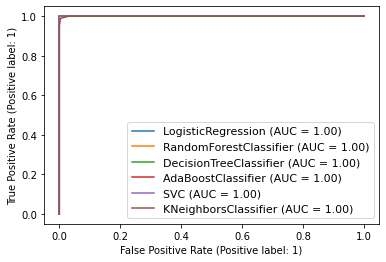

In [107]:
#using the roc_auc_curve 
dist=plot_roc_curve(lr,x_test,y_test)
plot_roc_curve(rfc,x_test,y_test,ax=dist.ax_)#abc svc, 
plot_roc_curve(dt,x_test,y_test,ax=dist.ax_)
plot_roc_curve(abc,x_test,y_test,ax=dist.ax_)
plot_roc_curve(svc,x_test,y_test,ax=dist.ax_)
plot_roc_curve(knn,x_test,y_test,ax=dist.ax_)

plt.legend(prop={'size':11},loc='lower right')
plt.show()

In [ ]:
#As all the models are showing 100% accuracy after the accuracy score and cross validation score.
#we can select any model as a final model.

In [ ]:
#Here all the models are showing 100% after the cross validation score also,no need to perform the hyper parameter tuning.

In [ ]:
#Now we can save our model,we are selecting decision tree classifier as our final model.

In [111]:
import joblib
joblib.dump(dt,'HR_Analytics_Model.pkl')

['HR_Analytics_Model.pkl']

In [ ]:
#this compeletes our model.